In [2]:
import torch
import torch.nn as nn
import torch.utils.data.dataset as td
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np
import cv2
import os

Matplotlib is building the font cache; this may take a moment.


In [28]:
class CompCarDataset(td.Dataset):
    def __init__(self, speed, train):
        postfix1 = "train" if train else "test"
        postfix2 = "speed" if speed else "type"

        mean = [0.4695975, 0.47956536, 0.49133955] # Caclulated using the training set
        std = [0.07418917, 0.0721986, 0.07223192] # Calculated using the training set

        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            transforms.Pad((0, 121))
            transforms.Resize((224, 224))
        ])

        self.path_image = "comp-cars/" + postfix1 + "/images"
        self.path_label = "comp-cars/" + postfix1 + "/" + postfix2

        self.images = os.listdir(os.path.join(self.path_image))
        self.labels = os.listdir(os.path.join(self.path_label))
        self.images.sort()
        self.labels.sort()
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        imagefile = os.path.join(self.path_image, self.images[idx])
        labelfile = open(os.path.join(self.path_label, self.labels[idx]), "r")
        img = self.transform(cv2.imread(imagefile))
        lbl = labelfile.read()
        return img, lbl


In [9]:
class BasicBlockResNet(nn.Module):
    def __init__(self):
        NotImplemented

    def forward(self, x):
        NotImplemented

In [8]:
class ResNet18(nn.Module):
    def __init__(self):
        NotImplemented

    def forward(self, x):
        NotImplemented

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([3, 626, 1150])


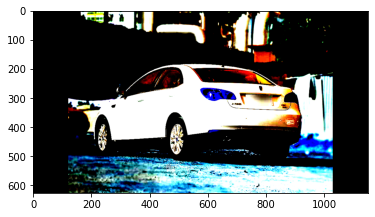

In [29]:
data = CompCarDataset("speed", "train")
img, lbl = data.__getitem__(600)
print(img.shape)
plt.imshow(img.permute(1, 2, 0))